***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date:11/23}}$<br>
***

# KINETICS
***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 

Rxn 1:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ CO(g) + * \rightleftharpoons CO^{*} $  <br> 

Rxn 2:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $  <br> 

Rxn 3:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}^* + * \rightleftharpoons 2{O}^* $  <br> 

Rxn 4:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}^* + * $  <br> 

Rxn 5:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O_2}^{*} \rightleftharpoons {{CO}_2}^* + O^* $  <br> 

Rxn 6:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO_2}^{*} \rightleftharpoons {{CO}_2}(g) + * $  <br> 

---------------------------------
Rxn 7:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}{(g)} + *\rightleftharpoons {{NO}^*} $  <br> 

Rxn 8:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O}^* \rightleftharpoons {{{NO}_2}^*} + *$  <br> 

Rxn 9:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O_2}^* \rightleftharpoons {{{NO}_2}^*} + O^*$  <br> 

Rxn 10:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {{{NO}_2}^*} + *\rightleftharpoons {NO}{(g)} + * $  <br> 

---------------------------------

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$


Rate Equations (CO Oxidation):&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \theta_{{CO}_2} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{CO} \cdot \theta_{O_2} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{O} $$

$$r_6 = k_{6}^f \cdot \theta_{{CO}_2}  - k_{6}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*} $$



Rate Equations (NO Oxidation):&emsp;

$$r_7 = k_{7}^f \cdot \textrm{P}_{NO} \cdot \theta_{*} - k_{7}^r \cdot \theta_{NO} $$

$$r_8 = k_{8}^f \cdot \theta_{NO} \cdot \theta_{O} - k_{8}^r \cdot \theta_{{NO}_2}\cdot  \theta_{*} $$

$$r_9 = k_{9}^f \cdot \theta_{NO} \cdot \theta_{O_2} - k_{9}^r \cdot \theta_{{NO}_2} \cdot \theta_{O} $$

$$r_{10} = k_{10}^f \cdot \theta_{{NO}_2} - k_{10}^r \cdot \textrm{P}_{{NO}_2} \cdot \theta_{*} $$





In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class PFR:
    def __init__(self,T=150, Feed_Mol_pcnt = [0.000511, 0.1019,0 , 0.0002, 0], Rate_Coeff = []):
        ######PFR Modelling
        self.Total_Volume = 1.0  #L
        self.Total_Pressure = 1.0 #atm
        self.Total_Flowrate = 658137 #*(1/3600) ## Total Flowrate L/s (GHSV * Cat.Vol) * (Convertion to per s)
        self.Volume_Step = 0.01 #Optional
        self.Volume = np.arange(0, self.Total_Volume+(2*self.Volume_Step), self.Volume_Step, dtype=float) #Volume array #Can be customized #mandatory
        self.T = T
        self.Gas_Species = ['CO','O2','CO2','NO','NO2']
        self.Surface_Species = ['*','CO*','O2*','O*','CO2*','NO*','NO2*']

        #Catalyst Info
        ##Site Densities: Pt/Pd Pd/Cu Pt/Cu Cu Only : 52 103 103 154 umol/g
        self.Site_density = 5e-6 #moles of sites/gram of catalyst
        self.Catalyst_gram =  0.14*(1000)*self.Total_Volume # mg/L -> grams
        #0.14 grams of catalyst per mililitre of reactor. #GHSV
        #NA = 6.022e23 #Avogadro's number (no. of molecules in a mole)
        
        ##Feed Info
        self.Feed_Mol_pcnt = Feed_Mol_pcnt
        #CO | O2 | CO2 | NO | NO2 |  #assume rest is inert if not balanced (i.e add up to 100%)

        self.Feed_Partial_Pressures = np.array(self.Feed_Mol_pcnt)  * self.Total_Pressure
        self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2 = list(self.Feed_Partial_Pressures)
        self.Feed_mol_frac = self.Feed_Partial_Pressures/self.Total_Pressure

        self.F_rate = self.Feed_mol_frac * self.Total_Flowrate * (1/22.4) #Initial Flowrate L/h -> mol/hr
        self.scale =22.00

        self.T0 = 150 #degrees Celsius
        
        self.Rate_Coeff = Rate_Coeff
        if self.Rate_Coeff == []:
            self.Rate_Coeff = np.array([135,1,169,1,91,1,2000,12.467,2000,12.467,91,1,151,1,50,0.5,50,0.5,91,1])
            
        self.k1f_o = self.Rate_Coeff[0]
        self.k1r_o = self.Rate_Coeff[1]
        self.k2f_o = self.Rate_Coeff[2]
        self.k2r_o = self.Rate_Coeff[3]
        self.k3f_o = self.Rate_Coeff[4]
        self.k3r_o = self.Rate_Coeff[5]
        self.k4f_o = self.Rate_Coeff[6]
        self.k4r_o = self.Rate_Coeff[7]
        self.k5f_o = self.Rate_Coeff[8]
        self.k5r_o = self.Rate_Coeff[9]
        self.k6f_o = self.Rate_Coeff[10]
        self.k6r_o = self.Rate_Coeff[11]
        self.k7f_o = self.Rate_Coeff[12]
        self.k7r_o = self.Rate_Coeff[13]
        self.k8f_o = self.Rate_Coeff[14]
        self.k8r_o = self.Rate_Coeff[15]
        self.k9f_o = self.Rate_Coeff[16]
        self.k9r_o = self.Rate_Coeff[17]
        self.k10f_o = self.Rate_Coeff[18]
        self.k10r_o = self.Rate_Coeff[19]
        
        self.Ea_k1f= 1
        self.Ea_k1r = 1
        self.Ea_k2f = 1
        self.Ea_k2r = 1
        self.Ea_k3f = 1
        self.Ea_k3r = 1
        self.Ea_k4f = 10000
        self.Ea_k4r = 1
        self.Ea_k5f = 10000
        self.Ea_k5r = 1
        self.Ea_k6f = 1
        self.Ea_k6r = 1
        self.Ea_k7f = 1
        self.Ea_k7r = 1
        self.Ea_k8f = 10000
        self.Ea_k8r = 1
        self.Ea_k9f = 10000
        self.Ea_k9r = 1
        self.Ea_k10f = 1
        self.Ea_k10r = 1
        
        self.R = 1
        
        self.k1f = self.k1f_o * np.exp(-(self.Ea_k1f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k1r = self.k1r_o * np.exp(-(self.Ea_k1r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k2f = self.k2f_o * np.exp(-(self.Ea_k2f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k2r = self.k2r_o * np.exp(-(self.Ea_k2r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k3f = self.k3f_o * np.exp(-(self.Ea_k3f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k3r = self.k3r_o * np.exp(-(self.Ea_k3r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k4f = self.k4f_o * np.exp(-(self.Ea_k4f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k4r = self.k4r_o * np.exp(-(self.Ea_k4r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k5f = self.k5f_o * np.exp(-(self.Ea_k5f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k5r = self.k5r_o * np.exp(-(self.Ea_k5r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k6f = self.k6f_o * np.exp(-(self.Ea_k6f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k6r = self.k6r_o * np.exp(-(self.Ea_k6r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k7f = self.k7f_o * np.exp(-(self.Ea_k7f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k7r = self.k7r_o * np.exp(-(self.Ea_k7r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k8f = self.k8f_o * np.exp(-(self.Ea_k8f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k8r = self.k8r_o * np.exp(-(self.Ea_k8r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k9f = self.k9f_o * np.exp(-(self.Ea_k9f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k9r = self.k9r_o * np.exp(-(self.Ea_k9r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k10f = self.k10f_o * np.exp(-(self.Ea_k10f/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k10r = self.k10r_o * np.exp(-(self.Ea_k10r/self.R) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        

        self.Rate_constants = np.array([self.k1f,self.k1r,self.k2f,self.k2r,self.k3f,
                                        self.k3r,self.k4f,self.k4r,self.k5f,self.k5r,self.k6f,
                                        self.k6r,self.k7f,self.k7r,self.k8f,self.k8r,self.k9f,
                                        self.k9r,self.k10f,self.k10r])

        self.K1 = self.k1f/self.k1r
        self.K2 = self.k2f/self.k2r
        self.K3 = self.k3f/self.k3r
        self.K4 = self.k4f/self.k4r
        self.K5 = self.k5f/self.k5r
        self.K6 = self.k6f/self.k6r
        self.K7 = self.k7f/self.k7r
        self.K8 = self.k8f/self.k8r
        self.K9 = self.k9f/self.k9r
        self.K10 = self.k10f/self.k10r

        self.Equilibrium_constants = np.array([self.K1,self.K2,self.K3,self.K4,self.K5,
                                               self.K6,self.K7,self.K8,self.K9,self.K10])

        #TO STORE
        self.Flow_array = np.zeros((len(self.Volume),len(self.Feed_Mol_pcnt)))
        self.Flow_array[0,:] = self.F_rate/self.scale
        self.Partial_Pressure = np.zeros((len(self.Volume),len(self.Feed_Mol_pcnt)))
        
        self.Partial_Pressure[0,:] = [self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2]
        self.Covgs = np.zeros((len(self.Volume),7))
        self.Rxs1 = np.zeros((len(self.Volume),1))
        self.Rxs2 = np.zeros((len(self.Volume),1))
        
    
    def check_coverages(self,vec):  #Function to check if the coverages being inputted make sense (Note in this code empty sites are not inputted, they're calculated automatically)
        
        vec = [0.0 if x < 1e-20 else x for x in vec]   #np.array([0.0 if x < 1e-20 else x for x in np.any(covg)]) #Helpful for restart cases #bandaid fix
        
        vec = [1.0 if (x > 1.0 and x<1.1) else x for x in vec]
        
        if (np.round(float(np.sum(vec)),0))!=1.0 or (all(x >= 0.0 for x in vec)!=True) or (all(x <= 1.0 for x in vec)!=True):
            print(vec)
            raise Exception('Error: The initial coverages entered are not valid. Issues may include:'
                            '\n 1. Sum of initial coverages enetered does not add up to 1 ; '
                            '\n 2. Initial coverages enetered has a number X>1 or X<0 ;'
                            '\n Please double check the initial coverages entered and make the necessary corrections')
        else:
            return vec
        
    def solve(self):
        for i in np.arange(len(self.Volume)-1):
            self.del_V = np.abs(self.Volume[i+1] - self.Volume[i])

            ##Updating Coverages
            self.th_e = 1/(1+(self.K1*self.PCO)+(self.K2*self.PO2)+np.sqrt(self.K2*self.K3*self.PO2)+\
                           ((1/self.K6)*self.PCO2)+(self.K7*self.PNO)+(self.PNO2/self.K10))
            self.th_CO = self.K1*self.PCO*self.th_e
            self.th_O2 = self.K2*self.PO2*self.th_e
            self.th_O = np.sqrt(self.K2*self.K3*self.PO2)*self.th_e
            self.th_CO2 = (1/self.K6) * self.PCO2 * self.th_e
            self.th_NO = self.K7*self.PNO*self.th_e
            self.th_NO2 = (1/self.K10)*self.PNO2*self.th_e
            
            self.Covgs[i,:] = [self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO,self.th_NO2] 
            self.check_coverages(self.Covgs[i,:])
            
            ##Updating Rates of Reaction
            ##Steady State Rate of Reaction Calculations PSSA_PEA
            ###Rx1 : CO Oxidation
            self.Rx1_num = (self.k4f*self.K1*np.sqrt(self.K2*self.K3)*self.PCO*np.sqrt(self.PO2)) + \
                        (self.k5f*self.K1*self.K2*self.PCO*self.PO2) - (self.k4r*(1/self.K6)*self.PCO2) - \
                        (self.k5r*(1/self.K6)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PCO2)
            
            ###Rx2 : NO Oxidation
            self.Rx2_num = (self.k8f*self.K7*np.sqrt(self.K2*self.K3)*self.PNO*np.sqrt(self.PO2)) + \
                            (self.k9f*self.K7*self.K2*self.PNO*self.PO2) - (self.k8r*(1/self.K10)*self.PNO2) - \
                                (self.k9r*(1/self.K10)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PNO2)
            self.Rx1_cal = self.Rx1_num*((self.th_e)**2)
            self.Rx2_cal = self.Rx2_num*((self.th_e)**2)
            self.Rxs1[i] = self.Rx1_cal
            self.Rxs2[i] = self.Rx2_cal

            
            self.Flow_array[i+1,0] = self.Flow_array[i,0] - (self.Rx1_cal*self.del_V)  #CO
            self.Flow_array[i+1,1] = self.Flow_array[i,1] - ((self.Rx1_cal*0.5 + self.Rx2_cal*0.5) *self.del_V) #O2
            self.Flow_array[i+1,2] = self.Flow_array[i,2] + (self.Rx1_cal*self.del_V)  #CO2
            self.Flow_array[i+1,3] = self.Flow_array[i,3] - (self.Rx2_cal*self.del_V)  #NO
            self.Flow_array[i+1,4] = self.Flow_array[i,4] + (self.Rx2_cal*self.del_V)  #NO2

            self.Total_Flow = sum(self.Flow_array[i+1,:]) + 1198.5 #Other Non_reacting species

            ##Updating Partial Pressures
            self.PCO = (self.Flow_array[i+1,0]/self.Total_Flow)*self.Total_Pressure
            self.PO2 = (self.Flow_array[i+1,1]/self.Total_Flow)*self.Total_Pressure
            self.PCO2 = (self.Flow_array[i+1,2]/self.Total_Flow)*self.Total_Pressure
            self.PNO = (self.Flow_array[i+1,3]/self.Total_Flow)*self.Total_Pressure
            self.PNO2 = (self.Flow_array[i+1,4]/self.Total_Flow)*self.Total_Pressure

            self.F_rate = self.Flow_array[i+1,:]
            
            self.Partial_Pressure[i+1,:] = [self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2]
            
        return self.Flow_array

    def outlet(self):

        out_flow = self.solve() #extracting flow array
        
        Inflow = out_flow[0,:]
        Outflow = out_flow[-1,:]
        
        X_conv = (np.ones(len(Inflow))-np.divide(Outflow,Inflow))*100
        
        X_conv = [0.0 if x == float("inf") or x == float("-inf") else x for x in X_conv]
        
        return X_conv


In [3]:
%%time
model = PFR(T = 141.7)
soln = model.solve()
X_con = model.outlet()

X_CO = X_con[0] #CO Conversion
X_NO = X_con[3] #NO Conversion

CPU times: user 10.7 ms, sys: 287 µs, total: 11 ms
Wall time: 11.4 ms


/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_47796/2081006709.py:210: RuntimeWarning: divide by zero encountered in true_divide
  X_conv = (np.ones(len(Inflow))-np.divide(Outflow,Inflow))*100


In [4]:
model.Rate_constants

array([1.34993617e+02, 9.99952719e-01, 1.68992010e+02, 9.99952719e-01,
       9.09956975e+01, 9.99952719e-01, 1.24648881e+03, 1.24664106e+01,
       1.24648881e+03, 1.24664106e+01, 9.09956975e+01, 9.99952719e-01,
       1.50992861e+02, 9.99952719e-01, 3.11622203e+01, 4.99976360e-01,
       3.11622203e+01, 4.99976360e-01, 9.09956975e+01, 9.99952719e-01])

In [5]:
print(X_CO)

88.53000908040505


In [6]:
print(X_NO)

5.862827120149072


# Plotting

In [7]:
colors = ['b','g','m','r','c','y','k'] 

### Coverages

<IPython.core.display.Javascript object>


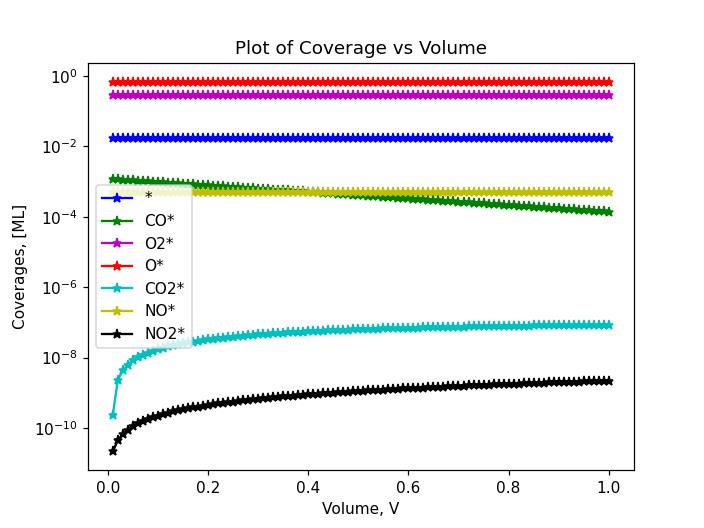

In [8]:
plt.figure()
for i in np.arange(len(model.Surface_Species)):
    plt.semilogy(model.Volume[1:-1], model.Covgs[1:-1,i], colors[i]+'*-', label=model.Surface_Species[i]) 

plt.title('Plot of Coverage vs Volume')
plt.xlabel('Volume, V')
plt.ylabel("Coverages, [ML]")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


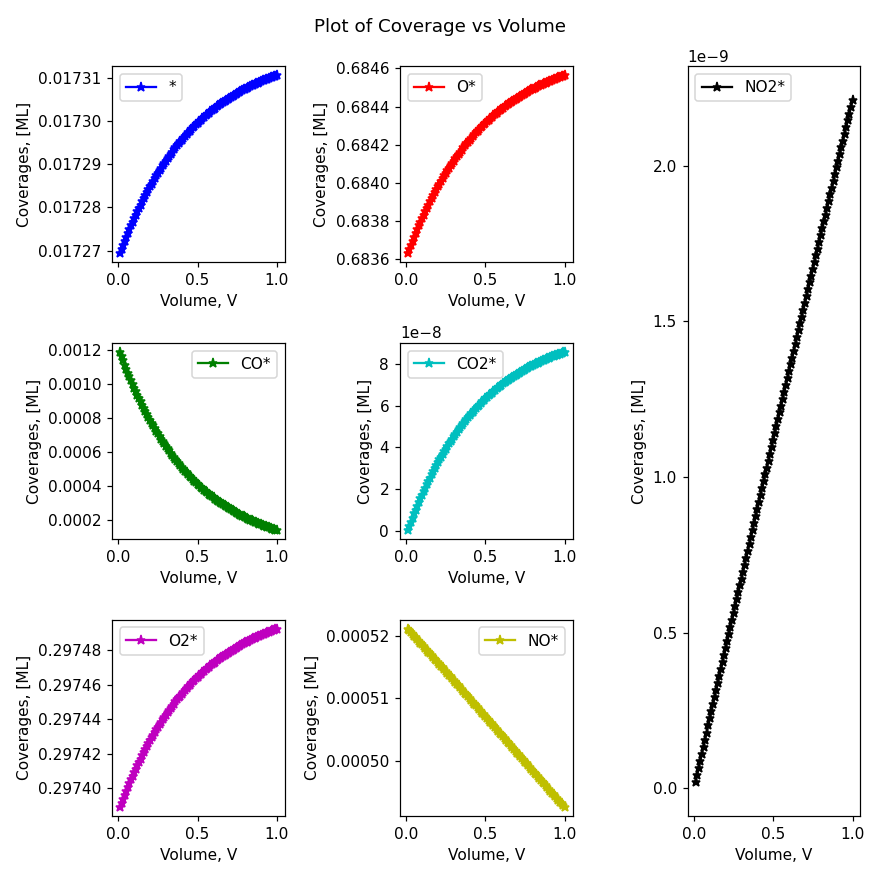

In [9]:
from matplotlib import gridspec

fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(6, 3)

ax0 = plt.subplot(gs[0:2,0])
ax0.plot(model.Volume[1:-1], model.Covgs[1:-1,0], colors[0]+'*-', label=model.Surface_Species[0])
ax0.set_xlabel('Volume, V')
ax0.set_ylabel("Coverages, [ML]")
ax0.legend(loc='best')
ax1 = plt.subplot(gs[2:4,0])
ax1.plot(model.Volume[1:-1], model.Covgs[1:-1,1], colors[1]+'*-', label=model.Surface_Species[1]) 
ax1.set_xlabel('Volume, V')
ax1.set_ylabel("Coverages, [ML]")
ax1.legend(loc='best')
ax2 = plt.subplot(gs[4:6,0])
ax2.plot(model.Volume[1:-1], model.Covgs[1:-1,2], colors[2]+'*-', label=model.Surface_Species[2])
ax2.set_xlabel('Volume, V')
ax2.set_ylabel("Coverages, [ML]")
ax2.legend(loc='best')

ax3 = plt.subplot(gs[0:2,1])
ax3.plot(model.Volume[1:-1], model.Covgs[1:-1,3], colors[3]+'*-', label=model.Surface_Species[3]) 
ax3.set_xlabel('Volume, V')
ax3.set_ylabel("Coverages, [ML]")
ax3.legend(loc='best')
ax4 = plt.subplot(gs[2:4,1])
ax4.plot(model.Volume[1:-1], model.Covgs[1:-1,4], colors[4]+'*-', label=model.Surface_Species[4])
ax4.set_xlabel('Volume, V')
ax4.set_ylabel("Coverages, [ML]")
ax4.legend(loc='best')
ax5 = plt.subplot(gs[4:6,1])
ax5.plot(model.Volume[1:-1], model.Covgs[1:-1,5], colors[5]+'*-', label=model.Surface_Species[5]) 
ax5.set_xlabel('Volume, V')
ax5.set_ylabel("Coverages, [ML]")
ax5.legend(loc='best')

ax6 = plt.subplot(gs[0:6,2])
ax6.plot(model.Volume[1:-1], model.Covgs[1:-1,6], colors[6]+'*-', label=model.Surface_Species[6]) 
ax6.set_xlabel('Volume, V')
ax6.set_ylabel("Coverages, [ML]")
ax6.legend(loc='best')

fig.suptitle('Plot of Coverage vs Volume')
plt.tight_layout()

plt.show()

### Partial Pressures

<IPython.core.display.Javascript object>


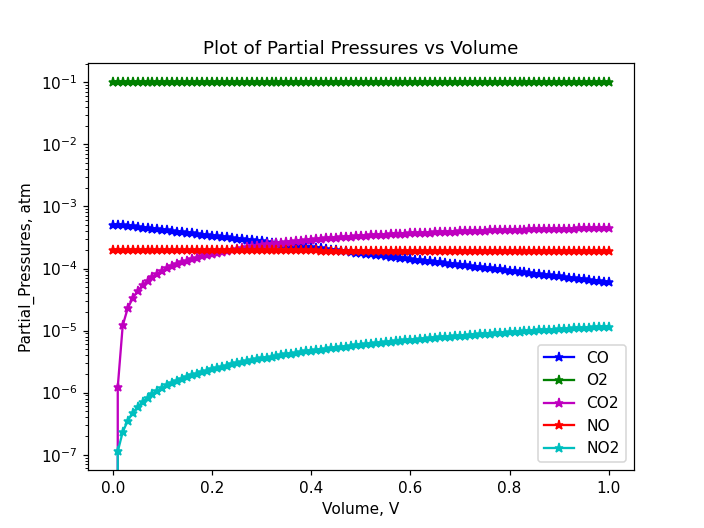

In [10]:
plt.figure()
for i in np.arange(len(model.Gas_Species)):
    plt.semilogy(model.Volume[0:-1], model.Partial_Pressure[0:-1,i], colors[i]+'*-', label=model.Gas_Species[i]) 

plt.title('Plot of Partial Pressures vs Volume')
plt.xlabel('Volume, V')
plt.ylabel("Partial_Pressures, atm")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


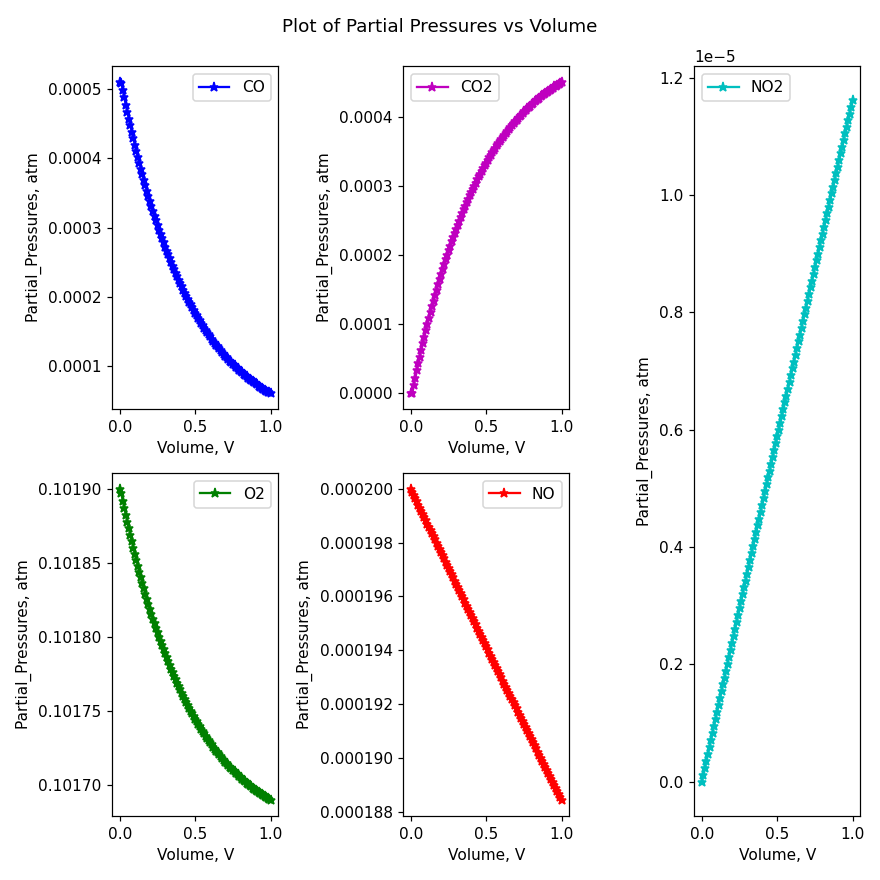

In [11]:
from matplotlib import gridspec

fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(4, 3)

ax0 = plt.subplot(gs[0:2,0])
ax0.plot(model.Volume[0:-1], model.Partial_Pressure[0:-1,0], colors[0]+'*-', label=model.Gas_Species[0])
ax0.set_xlabel('Volume, V')
ax0.set_ylabel("Partial_Pressures, atm")
ax0.legend(loc='best')
ax1 = plt.subplot(gs[2:4,0])
ax1.plot(model.Volume[0:-1], model.Partial_Pressure[0:-1,1], colors[1]+'*-', label=model.Gas_Species[1]) 
ax1.set_xlabel('Volume, V')
ax1.set_ylabel("Partial_Pressures, atm")
ax1.legend(loc='best')

ax2 = plt.subplot(gs[0:2,1])
ax2.plot(model.Volume[0:-1], model.Partial_Pressure[0:-1,2], colors[2]+'*-', label=model.Gas_Species[2]) 
ax2.set_xlabel('Volume, V')
ax2.set_ylabel("Partial_Pressures, atm")
ax2.legend(loc='best')
ax3 = plt.subplot(gs[2:4,1])
ax3.plot(model.Volume[0:-1], model.Partial_Pressure[0:-1,3], colors[3]+'*-', label=model.Gas_Species[3])
ax3.set_xlabel('Volume, V')
ax3.set_ylabel("Partial_Pressures, atm")
ax3.legend(loc='best')

ax4 = plt.subplot(gs[0:4,2])
ax4.plot(model.Volume[0:-1], model.Partial_Pressure[0:-1,4], colors[4]+'*-', label=model.Gas_Species[4]) 
ax4.set_xlabel('Volume, V')
ax4.set_ylabel("Partial_Pressures, atm")
ax4.legend(loc='best')

fig.suptitle('Plot of Partial Pressures vs Volume')

plt.tight_layout()

plt.show()